In [5]:
import os
# Get the current working directory
current_path = os.getcwd()
# Define the relative paths to your data and .venv folders
data_path = os.path.join(current_path, 'data')
venv_path = os.path.join(current_path, '.venv')

# Use the relative paths in your code
OPENSLIDE_PATH = os.path.join(venv_path, 'Lib', 'site-packages', 'openslide-win64-20230414', 'bin')

if hasattr(os, 'add_dll_directory'):
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide
from src import preprocessing as pp
from src import utils as ut
from openslide import open_slide
import matplotlib.pyplot as plt
import numpy as np

In [6]:
wsi_path = os.path.join(data_path, 'raw', 'train', 'tumor', 'tumor_001.tif')
save_path = os.path.join(data_path, 'preprocessed_patches', 'tumor_001')
ann_path = os.path.join(data_path, 'annotations', 'train', 'tumor_001.xml')

In [7]:
pp.extract_and_save_patches_and_labels(wsi_path, save_path, 0.2, ann_path, 5, 0, (512, 512), (512, 512), True)

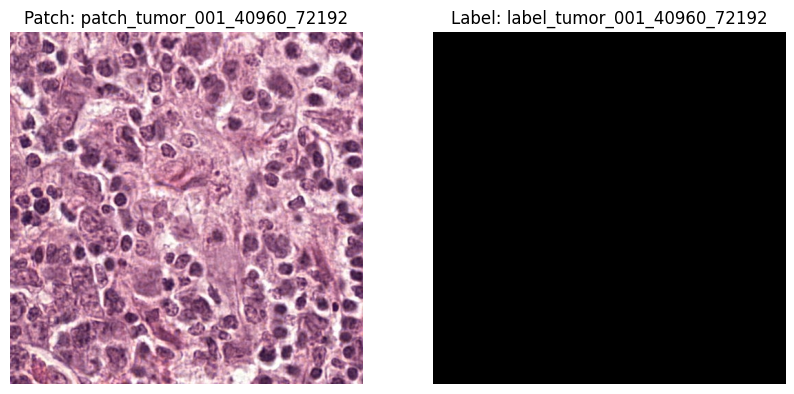

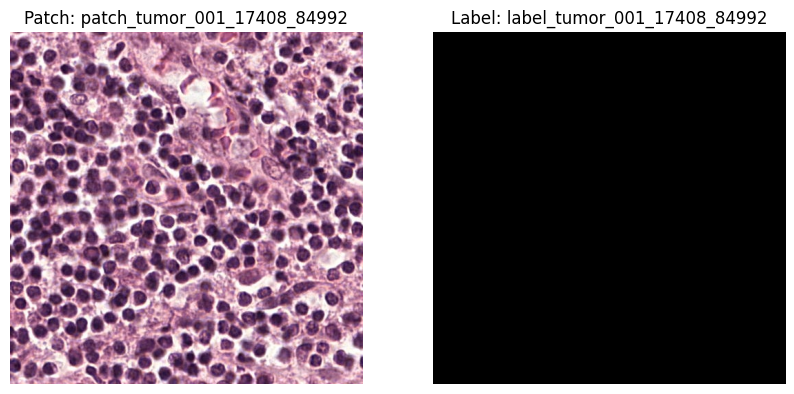

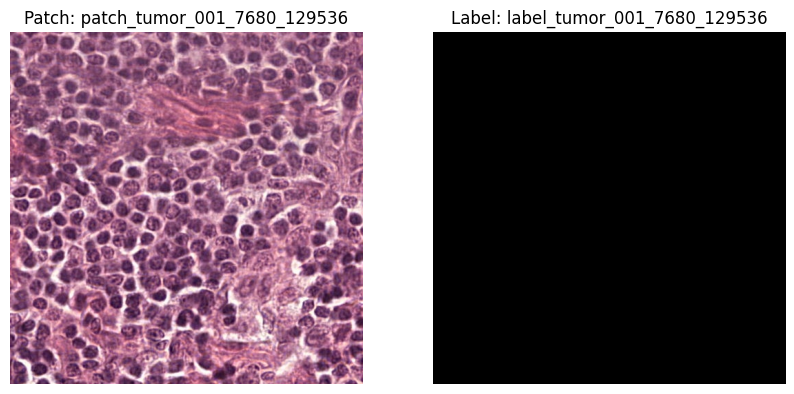

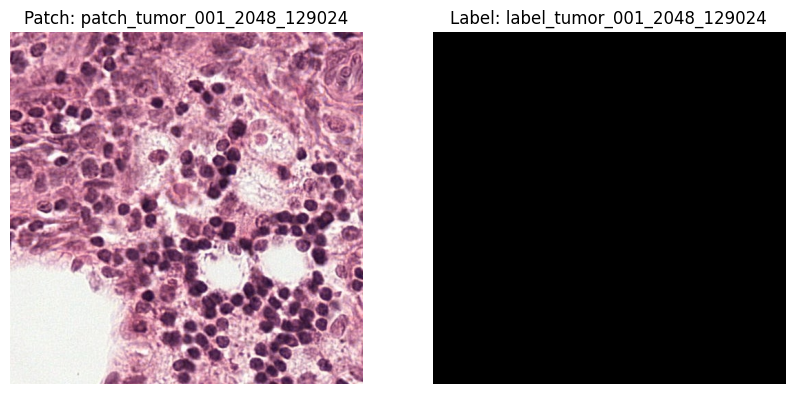

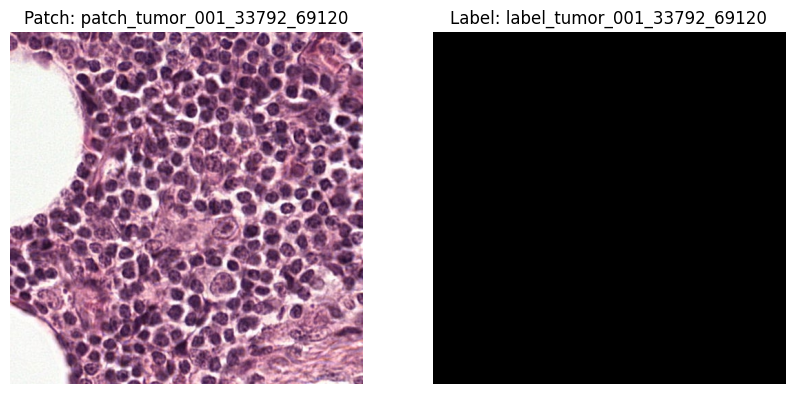

In [8]:
ut.visualize_patches_from_hdf5(save_path)

In [9]:
ut.visualize_tumor_patches_from_hdf5_and_annotations(save_path, ann_path)

IndexError: list index out of range